# Machine Learning

### Aim: To predict future values by fitting ML models on existing data

### Dataset used: MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km

### Target Variables: EVI, NDVI

# Preprocessing data files

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
os.listdir()

['.ipynb_checkpoints',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Bangalore shapefiles.csv',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Chennai shapefiles.csv',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_cities shapefiles.txt',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Cities.mp4',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Delhi Shape Files.csv',
 '24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Mumbai shapefiles.csv',
 'catboost_info',
 'EE Data Analysis.ipynb',
 'EE ML.ipynb']

In [2]:
df_bang = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Bangalore shapefiles.csv")
df_chennai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Chennai shapefiles.csv")
df_delhi = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Delhi Shape Files.csv")
df_mumbai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Mumbai shapefiles.csv")

In [3]:
df_bang.head()

,ASS_CONST1,EVI,NDVI,WARD_NAME,WARD_NO,date
0,Yelahanka,2049.325009,3749.680403,Kempegowda Ward,1.0,2000-02-18T00:00:00
1,Yelahanka,2173.734134,3984.821048,Chowdeswari Ward,2.0,2000-02-18T00:00:00
2,Yelahanka,2013.578811,3544.564853,Atturu,3.0,2000-02-18T00:00:00
3,Yelahanka,2257.561651,3960.141579,Yelahanka Satellite Town,4.0,2000-02-18T00:00:00
4,K.R. Puram,2208.604758,3754.638586,K R Puram,52.0,2000-02-18T00:00:00


In [4]:
df_chennai.head()

,EVI,NDVI,Ward_No,Zone_Name,Zone_No,date
0,2164.736253,3854.939547,0,St. Thomas Mount,-,2000-02-18T00:00:00
1,1828.857560,3793.179848,7,THIRUVOTTIYUR,I,2000-02-18T00:00:00
2,1004.904508,2745.285063,1,THIRUVOTTIYUR,I,2000-02-18T00:00:00
3,910.523639,2238.339073,2,THIRUVOTTIYUR,I,2000-02-18T00:00:00
4,1475.962406,3146.511768,3,THIRUVOTTIYUR,I,2000-02-18T00:00:00


In [5]:
df_delhi.head()

,EVI,NDVI,Ward_Name,Ward_No,date
0,1908.908293,3449.798267,NaN,NaN,2000-02-18T00:00:00
1,1856.574356,3192.695832,PUSA,150,2000-02-18T00:00:00
2,1915.048425,3079.115284,BHATI,176,2000-02-18T00:00:00
3,863.103856,1428.013392,DABRI,129,2000-02-18T00:00:00
4,1439.217421,2396.769225,DEOLI,173,2000-02-18T00:00:00


In [6]:
df_mumbai.head()

,EVI,NDVI,date,gid,name
0,752.675866,1633.026216,2000-02-18T00:00:00,1,A
1,655.656752,1349.610443,2000-02-18T00:00:00,2,B
2,640.692657,1277.904315,2000-02-18T00:00:00,3,C
3,1099.814742,2242.791811,2000-02-18T00:00:00,4,D
4,865.789163,1970.192934,2000-02-18T00:00:00,5,E


In [7]:
df_bang = df_bang.drop(columns=['ASS_CONST1','WARD_NO'])
df_chennai = df_chennai.drop(columns=['Zone_No'])
df_delhi = df_delhi.drop(columns=['Ward_No'])
df_mumbai = df_mumbai.drop(columns=['name'])

In [8]:
df_bang['date']=df_bang['date'].str.split('T').apply(lambda x:x[0])
df_bang['date']=pd.to_datetime(df_bang['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
bang = pd.DataFrame({'ward_name':df_bang['WARD_NAME'],'date':df_bang['date'],'year':df_bang['date'].apply(lambda x:x.year),
                     'month':df_bang['date'].apply(lambda x:x.month),'EVI':df_bang['EVI'],'NDVI':df_bang['NDVI']})

df_chennai['date']=df_chennai['date'].str.split('T').apply(lambda x:x[0])
df_chennai['date']=pd.to_datetime(df_chennai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
df_chennai['Ward_No']=df_chennai['Ward_No'].astype(str)
chennai = pd.DataFrame({'ward_name':df_chennai['Zone_Name']+'_'+df_chennai['Ward_No'],'date':df_chennai['date'],
                        'year':df_chennai['date'].apply(lambda x:x.year),'month':df_chennai['date'].apply(lambda x:x.month),
                        'EVI':df_chennai['EVI'],'NDVI':df_chennai['NDVI']})

df_delhi['date']=df_delhi['date'].str.split('T').apply(lambda x:x[0])
df_delhi['date']=pd.to_datetime(df_delhi['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
delhi = pd.DataFrame({'ward_name':df_delhi['Ward_Name'],'date':df_delhi['date'],'year':df_delhi['date'].apply(lambda x:x.year),
                      'month':df_delhi['date'].apply(lambda x:x.month),'EVI':df_delhi['EVI'],'NDVI':df_delhi['NDVI']})

df_mumbai['date']=df_mumbai['date'].str.split('T').apply(lambda x:x[0])
df_mumbai['date']=pd.to_datetime(df_mumbai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
mumbai = pd.DataFrame({'gid':df_mumbai['gid'],'date':df_mumbai['date'],'year':df_mumbai['date'].apply(lambda x:x.year),
                       'month':df_mumbai['date'].apply(lambda x:x.month),'EVI':df_mumbai['EVI'],'NDVI':df_mumbai['NDVI']})

In [9]:
bang.head()

,ward_name,date,year,month,EVI,NDVI
0,Kempegowda Ward,2000-02-01,2000,2,2049.325009,3749.680403
1,Chowdeswari Ward,2000-02-01,2000,2,2173.734134,3984.821048
2,Atturu,2000-02-01,2000,2,2013.578811,3544.564853
3,Yelahanka Satellite Town,2000-02-01,2000,2,2257.561651,3960.141579
4,K R Puram,2000-02-01,2000,2,2208.604758,3754.638586


In [10]:
bang_mean = bang.groupby('date').mean()
bang_mean = bang_mean.reset_index()
bang_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1841.286259,3170.631568
1,2000-03-01,2000,3,1987.458657,3133.192418
2,2000-04-01,2000,4,2032.155539,3264.212161
3,2000-05-01,2000,5,2424.859653,3465.048153
4,2000-06-01,2000,6,2663.616580,3813.603514


In [11]:
chennai.head()

,ward_name,date,year,month,EVI,NDVI
0,St. Thomas Mount_0,2000-02-01,2000,2,2164.736253,3854.939547
1,THIRUVOTTIYUR_7,2000-02-01,2000,2,1828.857560,3793.179848
2,THIRUVOTTIYUR_1,2000-02-01,2000,2,1004.904508,2745.285063
3,THIRUVOTTIYUR_2,2000-02-01,2000,2,910.523639,2238.339073
4,THIRUVOTTIYUR_3,2000-02-01,2000,2,1475.962406,3146.511768


In [12]:
chennai_mean = chennai.groupby('date').mean()
chennai_mean = chennai_mean.reset_index()
chennai_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1858.559052,3500.296371
1,2000-03-01,2000,3,2055.670225,3760.114231
2,2000-04-01,2000,4,2077.069303,3386.562028
3,2000-05-01,2000,5,1977.091646,3232.544412
4,2000-06-01,2000,6,2175.335210,3590.846720


In [13]:
delhi.head()

,ward_name,date,year,month,EVI,NDVI
0,NaN,2000-02-01,2000,2,1908.908293,3449.798267
1,PUSA,2000-02-01,2000,2,1856.574356,3192.695832
2,BHATI,2000-02-01,2000,2,1915.048425,3079.115284
3,DABRI,2000-02-01,2000,2,863.103856,1428.013392
4,DEOLI,2000-02-01,2000,2,1439.217421,2396.769225


In [14]:
delhi_mean = delhi.groupby('date').mean()
delhi_mean = delhi_mean.reset_index()
delhi_mean.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1338.129079,2304.837026
1,2000-03-01,2000,3,1440.229663,2408.900200
2,2000-04-01,2000,4,1326.585127,2128.851612
3,2000-05-01,2000,5,1299.983451,1825.803006
4,2000-06-01,2000,6,1555.686422,2018.713903


In [15]:
mumbai.head()

,gid,date,year,month,EVI,NDVI
0,1,2000-02-01,2000,2,752.675866,1633.026216
1,2,2000-02-01,2000,2,655.656752,1349.610443
2,3,2000-02-01,2000,2,640.692657,1277.904315
3,4,2000-02-01,2000,2,1099.814742,2242.791811
4,5,2000-02-01,2000,2,865.789163,1970.192934


In [16]:
mumbai_mean = mumbai.groupby('date').mean()
mumbai_mean = mumbai_mean.reset_index()
mumbai_mean.head()

,date,gid,year,month,EVI,NDVI
0,2000-02-01,12.5,2000.0,2.0,1196.178023,2511.908890
1,2000-03-01,12.5,2000.0,3.0,1191.450250,2359.546526
2,2000-04-01,12.5,2000.0,4.0,1400.155664,2457.931806
3,2000-05-01,12.5,2000.0,5.0,1707.029971,2760.730268
4,2000-06-01,12.5,2000.0,6.0,2135.109474,2907.084763


In [17]:
print(bang.shape)
print(chennai.shape)
print(delhi.shape)
print(mumbai.shape)

(93654, 6)
(95073, 6)
(137170, 6)
(11352, 6)


# Model Selection

## Models used

- > **Multi linear regression**

- > **SVM with rbf kernel**

- > **Artificial neural network**

- > **Decision trees**

- > **XGBoost**

- > **Random Forest**

- > **CatBoost**

## **`Returns model with best R2_Score`**

In [18]:
def model_selection(X_train_evi, y_train_evi, X_train_ndvi, y_train_ndvi, X_test_evi, y_test_evi, X_test_ndvi, y_test_ndvi):
    
    from sklearn.metrics import r2_score
    import warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.preprocessing import StandardScaler    # Feature Scaling
    sc_evi_x = StandardScaler()
    sc_ndvi_x = StandardScaler()
    sc_evi_y = StandardScaler()
    sc_ndvi_y = StandardScaler()
    X_train_evi_scaled = sc_evi_x.fit_transform(X_train_evi)
    X_train_ndvi_scaled = sc_ndvi_x.fit_transform(X_train_ndvi)
    y_train_evi_scaled = sc_evi_y.fit_transform(y_train_evi.reshape(-1,1))
    y_train_ndvi_scaled = sc_ndvi_y.fit_transform(y_train_ndvi.reshape(-1,1))
    X_test_evi_scaled = sc_evi_x.fit_transform(X_test_evi)
    X_test_ndvi_scaled = sc_ndvi_x.fit_transform(X_test_ndvi)
    
    # multilinear regression
    print("Regression model training....")
    from sklearn.linear_model import LinearRegression
    regressor_evi = LinearRegression()
    regressor_ndvi = LinearRegression()
    regressor_evi.fit(X_train_evi, y_train_evi)
    regressor_ndvi.fit(X_train_ndvi, y_train_ndvi)
    
    y_pred_reg_evi = regressor_evi.predict(X_test_evi)
    y_pred_reg_ndvi = regressor_ndvi.predict(X_test_ndvi)
    
    r2_score_reg_evi = r2_score(y_test_evi,y_pred_reg_evi)
    r2_score_reg_ndvi = r2_score(y_test_ndvi,y_pred_reg_ndvi)
    
    #SVM
    print("SVM training....")
    from sklearn.svm import SVR
    svm_evi = SVR(kernel='rbf')
    svm_ndvi = SVR(kernel='rbf')
    
    svm_evi.fit(X_train_evi_scaled,y_train_evi_scaled)
    svm_ndvi.fit(X_train_ndvi_scaled,y_train_ndvi_scaled)
    
    y_pred_svm_evi = svm_evi.predict(X_test_evi_scaled)
    y_pred_svm_ndvi = svm_ndvi.predict(X_test_ndvi_scaled)
    
    r2_score_svm_evi = r2_score(y_test_evi,sc_evi_y.inverse_transform(y_pred_svm_evi.reshape(-1,1)))
    r2_score_svm_ndvi = r2_score(y_test_ndvi,sc_ndvi_y.inverse_transform(y_pred_svm_ndvi.reshape(-1,1)))
    
    #Artificial Neural Network
    print("ANN training....")
    import tensorflow as tf
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
    ann_evi = tf.keras.models.Sequential()
    ann_evi.add(tf.keras.layers.Dense(units=16, activation='relu'))
    ann_evi.add(tf.keras.layers.Dense(units=16, activation='relu'))
    ann_evi.add(tf.keras.layers.Dense(units=1))
    ann_evi.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    ann_evi.fit(X_train_evi_scaled, y_train_evi_scaled, batch_size = 32, epochs = 100,verbose=0)
    y_pred_ann_evi = ann_evi.predict(X_test_evi_scaled)
    r2_score_ann_evi = r2_score(y_test_evi,sc_evi_y.inverse_transform(y_pred_ann_evi).reshape(-1,1))
    
    ann_ndvi = tf.keras.models.Sequential()
    ann_ndvi.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann_ndvi.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann_ndvi.add(tf.keras.layers.Dense(units=1))
    ann_ndvi.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    ann_ndvi.fit(X_train_ndvi_scaled, y_train_ndvi_scaled, batch_size = 32, epochs = 100,verbose=0)
    y_pred_ann_ndvi = ann_ndvi.predict(X_test_ndvi_scaled)
    r2_score_ann_ndvi = r2_score(y_test_ndvi,sc_ndvi_y.inverse_transform(y_pred_ann_ndvi.reshape(-1,1)))
    
    #Decision trees
    print("Decision trees model training....")
    from sklearn.tree import DecisionTreeRegressor
    dec_evi = DecisionTreeRegressor()
    dec_ndvi = DecisionTreeRegressor()
    dec_evi.fit(X_train_evi,y_train_evi)
    dec_ndvi.fit(X_train_ndvi,y_train_ndvi)
    
    y_pred_dec_evi = dec_evi.predict(X_test_evi)
    y_pred_dec_ndvi = dec_ndvi.predict(X_test_ndvi)
    
    r2_score_dec_evi = r2_score(y_test_evi,y_pred_dec_evi)
    r2_score_dec_ndvi = r2_score(y_test_ndvi,y_pred_dec_ndvi)

    #XGBoost
    print("XGBoost model training....")
    from xgboost import XGBRegressor
    xgb_evi = XGBRegressor(silent=True)
    xgb_ndvi = XGBRegressor(silent=True)
    xgb_evi.fit(X_train_evi, y_train_evi)
    xgb_ndvi.fit(X_train_ndvi, y_train_ndvi)
    
    y_pred_xgb_evi = xgb_evi.predict(X_test_evi)
    y_pred_xgb_ndvi = xgb_ndvi.predict(X_test_ndvi)
    
    r2_score_xgb_evi = r2_score(y_test_evi,y_pred_xgb_evi)
    r2_score_xgb_ndvi = r2_score(y_test_ndvi,y_pred_xgb_ndvi)
    
    # Random forest regressor
    print("Random Forest training....")
    from sklearn.ensemble import RandomForestRegressor
    forest_evi = RandomForestRegressor(n_estimators = 10, random_state = 0)
    forest_ndvi = RandomForestRegressor(n_estimators = 10, random_state = 0)
    forest_evi.fit(X_train_evi, y_train_evi)
    forest_ndvi.fit(X_train_ndvi, y_train_ndvi)
    
    y_pred_for_evi = forest_evi.predict(X_test_evi)
    y_pred_for_ndvi = forest_ndvi.predict(X_test_ndvi)
    
    r2_score_for_evi = r2_score(y_test_evi,y_pred_for_evi)
    r2_score_for_ndvi = r2_score(y_test_ndvi,y_pred_for_ndvi)
    
    # Catboost 
    print("CatBoost Model training....")
    from catboost import CatBoostRegressor
    cat_evi = CatBoostRegressor(verbose=0)
    cat_ndvi = CatBoostRegressor(verbose=0)
    cat_evi.fit(X_train_evi, y_train_evi)
    cat_ndvi.fit(X_train_ndvi, y_train_ndvi)
    
    y_pred_cat_evi = cat_evi.predict(X_test_evi)
    y_pred_cat_ndvi = cat_ndvi.predict(X_test_ndvi)

    r2_score_cat_evi = r2_score(y_test_evi,y_pred_cat_evi)
    r2_score_cat_ndvi = r2_score(y_test_ndvi,y_pred_cat_ndvi)
    
    print("\nModel\t\t\tEVI_R2_Score\t\tNDVI_R2_Score")
    print("--------------------------------------------------------------------")
    print(f"Regression\t\t{r2_score_reg_evi}\t{r2_score_reg_ndvi}")
    print(f"\nSVM\t\t\t{r2_score_svm_evi}\t{r2_score_svm_ndvi}")
    print(f"\nANN\t\t\t{r2_score_ann_evi}\t{r2_score_ann_ndvi}")
    print(f"\nDecision tree\t\t{r2_score_dec_evi}\t{r2_score_dec_ndvi}")
    print(f"\nXGBoost\t\t\t{r2_score_xgb_evi}\t{r2_score_xgb_ndvi}")
    print(f"\nRandom Forest\t\t{r2_score_for_evi}\t{r2_score_for_ndvi}")
    print(f"\nCatBoost\t\t{r2_score_cat_evi}\t{r2_score_cat_ndvi}")
    
    models_evi = {'Regression':[r2_score_reg_evi,regressor_evi],'XGBoost':[r2_score_xgb_evi,xgb_evi], 'SVM':[r2_score_svm_evi,svm_evi],
                  'ANN':[r2_score_ann_evi,ann_evi],'Decision':[r2_score_dec_evi,dec_evi] ,'Random Forest':[r2_score_for_evi,forest_evi],'CatBoost':[r2_score_cat_evi,cat_evi]}
    models_ndvi = {'Regression':[r2_score_reg_ndvi,regressor_ndvi],'XGBoost':[r2_score_xgb_ndvi,xgb_ndvi],'SVM':[r2_score_svm_ndvi,svm_ndvi],
                   'ANN':[r2_score_ann_ndvi,ann_ndvi],'Decision':[r2_score_dec_ndvi,dec_ndvi],'Random Forest':[r2_score_for_ndvi,forest_ndvi],'CatBoost':[r2_score_cat_ndvi,cat_ndvi]}
    
    evi_max = max(models_evi,key= lambda x: models_evi[x][0])
    ndvi_max = max(models_ndvi,key= lambda x: models_ndvi[x][0])
    
    print(f"\nMax R2 Score for EVI by {evi_max} model")
    print(f"Max R2 Score for NDVI by {ndvi_max} model")
    
    return models_evi[evi_max][1], models_ndvi[ndvi_max][1]

# Bangalore 

## Preprocessing 

In [19]:
# dropping missing or null values
bang = bang.dropna()
bang.shape

(93654, 6)

In [20]:
bang.head()

,ward_name,date,year,month,EVI,NDVI
0,Kempegowda Ward,2000-02-01,2000,2,2049.325009,3749.680403
1,Chowdeswari Ward,2000-02-01,2000,2,2173.734134,3984.821048
2,Atturu,2000-02-01,2000,2,2013.578811,3544.564853
3,Yelahanka Satellite Town,2000-02-01,2000,2,2257.561651,3960.141579
4,K R Puram,2000-02-01,2000,2,2208.604758,3754.638586


In [21]:
bang_x = bang.iloc[:, [0,2,3]].values
bang_evi_y = bang.iloc[:, 4].values
bang_ndvi_y = bang.iloc[:, 5].values

In [22]:
bang_x

array([['Kempegowda Ward', 2000, 2],
       ['Chowdeswari Ward', 2000, 2],
       ['Atturu', 2000, 2],
       ...,
       ['Konankunte', 2020, 8],
       ['Anjanapura', 2020, 8],
       ['Vasanthpura', 2020, 8]], dtype=object)

In [23]:
# label encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bang_x[:, 0] = le.fit_transform(bang_x[:, 0])
bang_x

array([[104, 2000, 2],
       [33, 2000, 2],
       [8, 2000, 2],
       ...,
       [107, 2020, 8],
       [4, 2020, 8],
       [185, 2020, 8]], dtype=object)

In [24]:
# Splitting into train test sets
from sklearn.model_selection import train_test_split
X_train_evi, X_test_evi, y_train_evi, y_test_evi = train_test_split(bang_x, bang_evi_y, test_size = 0.2, random_state = 1)
X_train_ndvi, X_test_ndvi, y_train_ndvi, y_test_ndvi = train_test_split(bang_x, bang_ndvi_y, test_size = 0.2, random_state = 1)

## Model Scores

In [25]:
model_evi, model_ndvi = model_selection(X_train_evi, y_train_evi,X_train_ndvi, y_train_ndvi,X_test_evi,y_test_evi,X_test_ndvi,y_test_ndvi)

Regression model training....
SVM training....
ANN training....
Decision trees model training....
XGBoost model training....
Random Forest training....
CatBoost Model training....

Model			EVI_R2_Score		NDVI_R2_Score
--------------------------------------------------------------------
Regression		0.10823475479144606	0.061172364555885816

SVM			0.1920291905577478	0.14917946049961373

ANN			0.2643413322742014	0.19847994647363132

Decision tree		0.31879996193317683	0.21835644610594107

XGBoost			0.39260313352879617	0.36433551090753546

Random Forest		0.4853580172662476	0.41583842239151436

CatBoost		0.6791980227744512	0.6563993783235234

Max R2 Score for EVI by CatBoost model
Max R2 Score for NDVI by CatBoost model


In [26]:
model_evi

In [27]:
model_ndvi

In [28]:
bang.ward_name.nunique()

198

In [29]:
from itertools import product
l1 = [ i for i in range(198)]
l2 = [ 2021 ]
l3 = [ i for i in range(1,13)]
l = list(product(l1,l2,l3))

In [30]:
m1=[]
m2=[]
m3=[]
m4=[]
for i in l:
    m1.append(i[0])
    m2.append(i[1])
    m3.append(i[2])
    m4.append(str(i[1])+'-'+str(i[2])+'-01')

In [31]:
bang_pred = pd.DataFrame({'ward_name':m1,'date':m4, 'year':m2, 'month':m3})
bang_pred['date']=pd.to_datetime(bang_pred['date'])

In [32]:
bang_pred_x = bang_pred.iloc[:, [0,2,3]].values
bang_evi = model_evi.predict(bang_pred_x)
bang_ndvi = model_ndvi.predict(bang_pred_x)
bang_pred['Predicted_EVI']=bang_evi
bang_pred['Predicted_NDVI']=bang_ndvi
bang_pred['ward_name']=le.inverse_transform(m1)

## Predictions of EVI, NDVI for Year 2021

In [33]:
bang_pred

,ward_name,date,year,month,Predicted_EVI,Predicted_NDVI
0,A Narayanapura,2021-01-01,2021,1,1276.116809,2663.260793
1,A Narayanapura,2021-02-01,2021,2,1220.627885,2402.015494
2,A Narayanapura,2021-03-01,2021,3,1410.802961,2602.429873
3,A Narayanapura,2021-04-01,2021,4,1743.880356,2896.812526
4,A Narayanapura,2021-05-01,2021,5,1959.529334,3221.052544
5,A Narayanapura,2021-06-01,2021,6,1866.744242,2841.687638
6,A Narayanapura,2021-07-01,2021,7,1781.898334,2349.085215
7,A Narayanapura,2021-08-01,2021,8,2394.451018,3593.031891
8,A Narayanapura,2021-09-01,2021,9,2328.876958,4150.834800
9,A Narayanapura,2021-10-01,2021,10,2278.281165,3973.740669


In [34]:
means = bang_pred.groupby('date').mean()
means = means.reset_index()
means 

,date,year,month,Predicted_EVI,Predicted_NDVI
0,2021-01-01,2021,1,1408.623312,2833.827861
1,2021-02-01,2021,2,1367.908757,2626.099301
2,2021-03-01,2021,3,1579.722156,2862.676891
3,2021-04-01,2021,4,1943.217975,3173.726035
4,2021-05-01,2021,5,2105.962330,3466.655219
5,2021-06-01,2021,6,1938.876368,3012.458128
6,2021-07-01,2021,7,1866.889338,2575.246829
7,2021-08-01,2021,8,2421.647616,3615.912341
8,2021-09-01,2021,9,2414.082484,4129.029436
9,2021-10-01,2021,10,2330.184887,3870.998559


## Predicted Trends

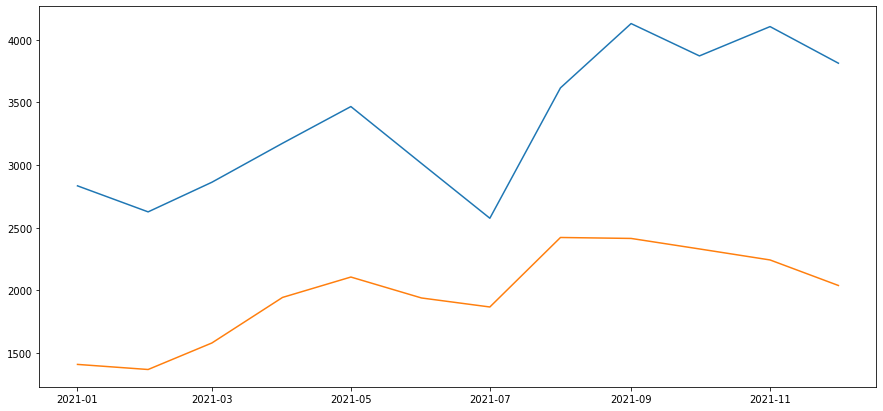

In [35]:
plt.figure(figsize=(15,7))
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

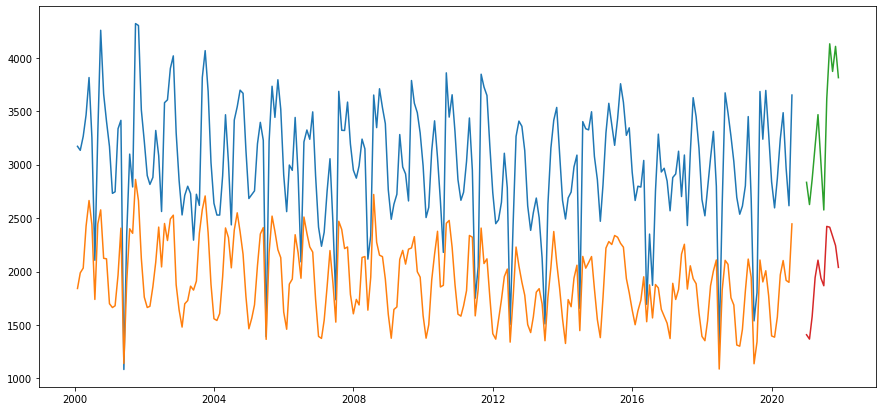

In [36]:
plt.figure(figsize=(15,7))
plt.plot(bang_mean.date,bang_mean.NDVI)
plt.plot(bang_mean.date,bang_mean.EVI)
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

# Chennai

## Preprocessing

In [37]:
# dropping missing or null values
chennai = chennai.dropna()
chennai.shape

(95073, 6)

In [38]:
chennai.head()

,ward_name,date,year,month,EVI,NDVI
0,St. Thomas Mount_0,2000-02-01,2000,2,2164.736253,3854.939547
1,THIRUVOTTIYUR_7,2000-02-01,2000,2,1828.857560,3793.179848
2,THIRUVOTTIYUR_1,2000-02-01,2000,2,1004.904508,2745.285063
3,THIRUVOTTIYUR_2,2000-02-01,2000,2,910.523639,2238.339073
4,THIRUVOTTIYUR_3,2000-02-01,2000,2,1475.962406,3146.511768


In [39]:
chennai_x = chennai.iloc[:, [0,2,3]].values
chennai_evi_y = chennai.iloc[:, 4].values
chennai_ndvi_y = chennai.iloc[:, 5].values

In [40]:
chennai_x

array([['St. Thomas Mount_0', 2000, 2],
       ['THIRUVOTTIYUR_7', 2000, 2],
       ['THIRUVOTTIYUR_1', 2000, 2],
       ...,
       ['ADYAR_172', 2020, 8],
       ['ADYAR_177', 2020, 8],
       ['ADYAR_178', 2020, 8]], dtype=object)

In [41]:
# label encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chennai_x[:, 0] = le.fit_transform(chennai_x[:, 0])
chennai_x

array([[125, 2000, 2],
       [170, 2000, 2],
       [159, 2000, 2],
       ...,
       [2, 2020, 8],
       [7, 2020, 8],
       [8, 2020, 8]], dtype=object)

In [42]:
# Splitting into train test sets
from sklearn.model_selection import train_test_split
X_train_evi, X_test_evi, y_train_evi, y_test_evi = train_test_split(chennai_x, chennai_evi_y, test_size = 0.2, random_state = 1)
X_train_ndvi, X_test_ndvi, y_train_ndvi, y_test_ndvi = train_test_split(chennai_x, chennai_ndvi_y, test_size = 0.2, random_state = 1)

## Model Scores

In [43]:
model_evi, model_ndvi = model_selection(X_train_evi, y_train_evi, X_train_ndvi, y_train_ndvi, X_test_evi, y_test_evi, X_test_ndvi, y_test_ndvi)

Regression model training....
SVM training....
ANN training....
Decision trees model training....
XGBoost model training....
Random Forest training....
CatBoost Model training....

Model			EVI_R2_Score		NDVI_R2_Score
--------------------------------------------------------------------
Regression		0.15606212786179252	0.1303199571592324

SVM			0.28580724425810733	0.24882056259435759

ANN			0.477885708009809	0.3281751048032151

Decision tree		0.5134037790513244	0.4143905545416364

XGBoost			0.5479233688931062	0.515736346465897

Random Forest		0.6474431853676637	0.5768799044994793

CatBoost		0.7518850471340778	0.7239611798675871

Max R2 Score for EVI by CatBoost model
Max R2 Score for NDVI by CatBoost model


In [44]:
chennai.ward_name.nunique()

201

In [45]:
from itertools import product
l1 = [ i for i in range(201)]
l2 = [ 2021 ]
l3 = [ i for i in range(1,13)]
l = list(product(l1,l2,l3))

In [46]:
m1=[]
m2=[]
m3=[]
m4=[]
for i in l:
    m1.append(i[0])
    m2.append(i[1])
    m3.append(i[2])
    m4.append(str(i[1])+'-'+str(i[2])+'-01')

In [47]:
chennai_pred = pd.DataFrame({'ward_name':m1,'date':m4, 'year':m2, 'month':m3})
chennai_pred['date']=pd.to_datetime(chennai_pred['date'])

In [48]:
chennai_pred_x = chennai_pred.iloc[:, [0,2,3]].values
chennai_evi = model_evi.predict(chennai_pred_x)
chennai_ndvi = model_ndvi.predict(chennai_pred_x)
chennai_pred['Predicted_EVI']=chennai_evi
chennai_pred['Predicted_NDVI']=chennai_ndvi
chennai_pred['ward_name']=le.inverse_transform(m1)

## Predictions of EVI, NDVI for Year 2021

In [49]:
chennai_pred

,ward_name,date,year,month,Predicted_EVI,Predicted_NDVI
0,ADYAR_170,2021-01-01,2021,1,2104.629648,3961.746056
1,ADYAR_170,2021-02-01,2021,2,1882.380667,3600.350600
2,ADYAR_170,2021-03-01,2021,3,1840.269938,3337.956786
3,ADYAR_170,2021-04-01,2021,4,2077.881601,3636.769547
4,ADYAR_170,2021-05-01,2021,5,2148.973068,3504.923787
5,ADYAR_170,2021-06-01,2021,6,2520.772142,3761.179990
6,ADYAR_170,2021-07-01,2021,7,2893.978703,4370.981316
7,ADYAR_170,2021-08-01,2021,8,2804.206800,4074.120163
8,ADYAR_170,2021-09-01,2021,9,2919.252269,4416.318270
9,ADYAR_170,2021-10-01,2021,10,1979.048417,2371.140854


In [50]:
means = chennai_pred.groupby('date').mean()
means = means.reset_index()
means 

,date,year,month,Predicted_EVI,Predicted_NDVI
0,2021-01-01,2021,1,1930.457285,3698.972872
1,2021-02-01,2021,2,1734.688928,3393.055578
2,2021-03-01,2021,3,1708.510816,3175.820331
3,2021-04-01,2021,4,1906.934590,3368.873344
4,2021-05-01,2021,5,1936.265132,3209.080759
5,2021-06-01,2021,6,2189.328585,3363.706747
6,2021-07-01,2021,7,2451.358180,3688.076770
7,2021-08-01,2021,8,2166.963744,3263.850186
8,2021-09-01,2021,9,2278.821827,3628.610801
9,2021-10-01,2021,10,1494.090950,1748.724926


## Predicted Trends

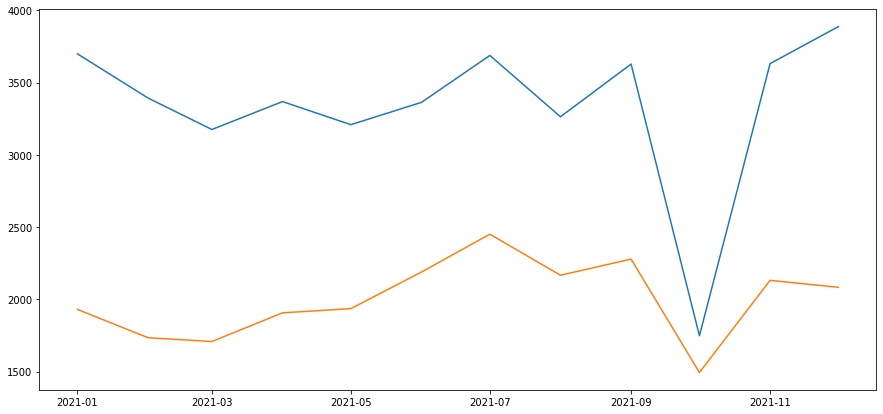

In [51]:
plt.figure(figsize=(15,7))
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

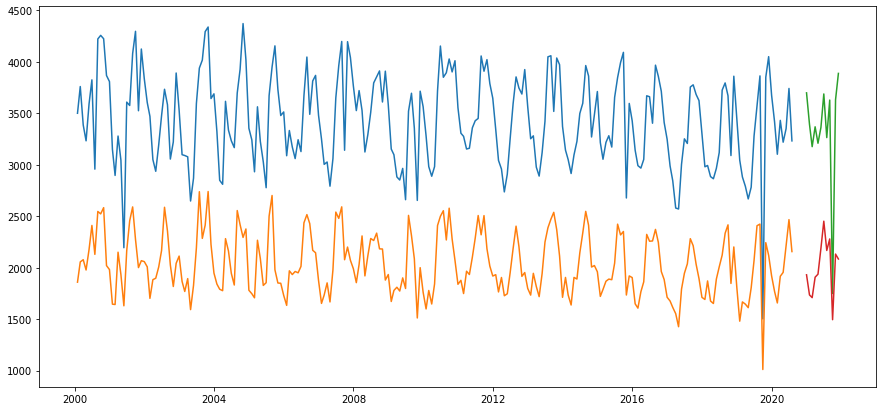

In [52]:
plt.figure(figsize=(15,7))
plt.plot(chennai_mean.date,chennai_mean.NDVI)
plt.plot(chennai_mean.date,chennai_mean.EVI)
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

# Delhi

## Preprocessing

In [53]:
# dropping missing or null values
delhi = delhi.dropna()
delhi.shape

(136697, 6)

In [54]:
delhi.head()

,ward_name,date,year,month,EVI,NDVI
1,PUSA,2000-02-01,2000,2,1856.574356,3192.695832
2,BHATI,2000-02-01,2000,2,1915.048425,3079.115284
3,DABRI,2000-02-01,2000,2,863.103856,1428.013392
4,DEOLI,2000-02-01,2000,2,1439.217421,2396.769225
5,KHERA,2000-02-01,2000,2,3867.621024,5634.693772


In [55]:
delhi_x = delhi.iloc[:, [0,2,3]].values
delhi_evi_y = delhi.iloc[:, 4].values
delhi_ndvi_y = delhi.iloc[:, 5].values

In [56]:
delhi_x

array([['PUSA', 2000, 2],
       ['BHATI', 2000, 2],
       ['DABRI', 2000, 2],
       ...,
       ['SAHIBABAD DAULAT PUR', 2020, 8],
       ['SANGAM VIHAR CENTRAL', 2020, 8],
       ['MAJOR BHUPINDAR SINGH NAGAR', 2020, 8]], dtype=object)

In [57]:
# label encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
delhi_x[:, 0] = le.fit_transform(delhi_x[:, 0])
delhi_x

array([[204, 2000, 2],
       [23, 2000, 2],
       [36, 2000, 2],
       ...,
       [231, 2020, 8],
       [236, 2020, 8],
       [131, 2020, 8]], dtype=object)

In [58]:
# Splitting into train test sets
from sklearn.model_selection import train_test_split
X_train_evi, X_test_evi, y_train_evi, y_test_evi = train_test_split(delhi_x, delhi_evi_y, test_size = 0.2, random_state = 1)
X_train_ndvi, X_test_ndvi, y_train_ndvi, y_test_ndvi = train_test_split(delhi_x, delhi_ndvi_y, test_size = 0.2, random_state = 1)

## Model Scores

In [59]:
model_evi, model_ndvi = model_selection(X_train_evi, y_train_evi, X_train_ndvi, y_train_ndvi, X_test_evi, y_test_evi, X_test_ndvi, y_test_ndvi)

Regression model training....
SVM training....
ANN training....
Decision trees model training....
XGBoost model training....
Random Forest training....
CatBoost Model training....

Model			EVI_R2_Score		NDVI_R2_Score
--------------------------------------------------------------------
Regression		0.030882247581831113	0.039164103412867246

SVM			0.2575262814406989	0.1712461024485148

ANN			0.31598448801058465	0.1977613995906985

Decision tree		0.6758504666765666	0.603042775405883

XGBoost			0.47141425271357285	0.4069860228994049

Random Forest		0.7560231638359538	0.7018331005528706

CatBoost		0.7541130193488971	0.7172141213576508

Max R2 Score for EVI by Random Forest model
Max R2 Score for NDVI by CatBoost model


In [60]:
delhi.ward_name.nunique()

288

In [61]:
from itertools import product
l1 = [ i for i in range(288)]
l2 = [ 2021 ]
l3 = [ i for i in range(1,13)]
l = list(product(l1,l2,l3))

In [62]:
m1=[]
m2=[]
m3=[]
m4=[]
for i in l:
    m1.append(i[0])
    m2.append(i[1])
    m3.append(i[2])
    m4.append(str(i[1])+'-'+str(i[2])+'-01')

In [63]:
delhi_pred = pd.DataFrame({'ward_name':m1,'date':m4, 'year':m2, 'month':m3})
delhi_pred['date']=pd.to_datetime(delhi_pred['date'])

In [64]:
delhi_pred_x = delhi_pred.iloc[:, [0,2,3]].values
delhi_evi = model_evi.predict(delhi_pred_x)
delhi_ndvi = model_ndvi.predict(delhi_pred_x)
delhi_pred['Predicted_EVI']=delhi_evi
delhi_pred['Predicted_NDVI']=delhi_ndvi
delhi_pred['ward_name']=le.inverse_transform(m1)

## Predictions of EVI, NDVI for Year 2021

In [65]:
delhi_pred

,ward_name,date,year,month,Predicted_EVI,Predicted_NDVI
0,ADARASH NAGAR,2021-01-01,2021,1,1058.998447,2532.707846
1,ADARASH NAGAR,2021-02-01,2021,2,1070.683851,2428.640304
2,ADARASH NAGAR,2021-03-01,2021,3,1514.162407,2732.549112
3,ADARASH NAGAR,2021-04-01,2021,4,1563.843442,2671.784287
4,ADARASH NAGAR,2021-05-01,2021,5,1514.905582,2424.282198
5,ADARASH NAGAR,2021-06-01,2021,6,1830.492606,2619.862385
6,ADARASH NAGAR,2021-07-01,2021,7,2098.821594,3016.250070
7,ADARASH NAGAR,2021-08-01,2021,8,1699.575377,3099.931406
8,ADARASH NAGAR,2021-09-01,2021,9,1721.535167,3179.313904
9,ADARASH NAGAR,2021-10-01,2021,10,1265.081505,2563.503374


In [66]:
means = delhi_pred.groupby('date').mean()
means = means.reset_index()
means 

,date,year,month,Predicted_EVI,Predicted_NDVI
0,2021-01-01,2021,1,1444.380649,2959.024026
1,2021-02-01,2021,2,1417.959087,2785.978245
2,2021-03-01,2021,3,1686.078055,3064.822088
3,2021-04-01,2021,4,1832.839971,2956.724189
4,2021-05-01,2021,5,1583.552198,2774.880449
5,2021-06-01,2021,6,2058.625514,2956.123302
6,2021-07-01,2021,7,2562.166457,3410.602427
7,2021-08-01,2021,8,2411.154187,3556.904144
8,2021-09-01,2021,9,2325.321086,3701.280924
9,2021-10-01,2021,10,1732.503548,3162.923031


## Predicted Trends

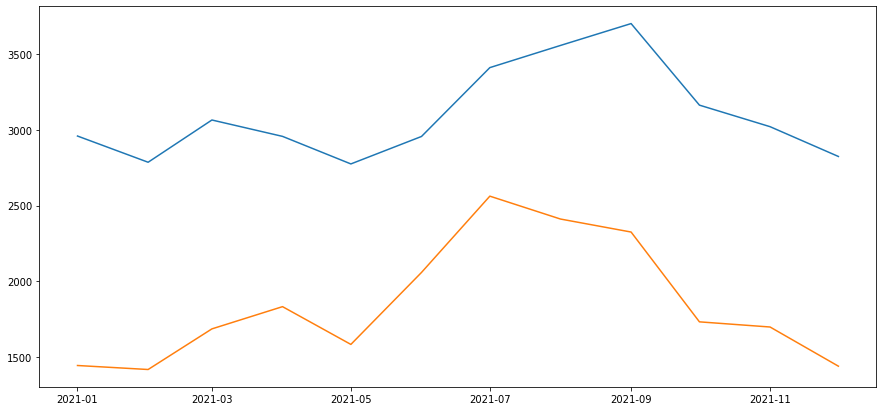

In [67]:
plt.figure(figsize=(15,7))
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

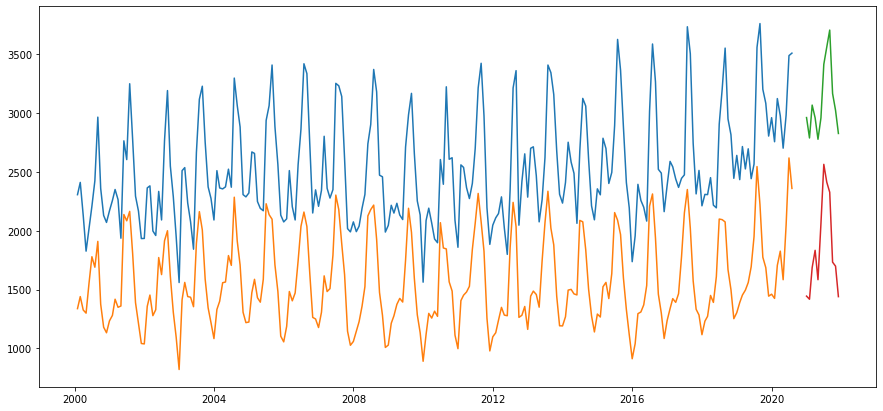

In [68]:
plt.figure(figsize=(15,7))
plt.plot(delhi_mean.date,delhi_mean.NDVI)
plt.plot(delhi_mean.date,delhi_mean.EVI)
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

# Mumbai

## Preprocessing

In [69]:
# dropping missing or null values
mumbai = mumbai.dropna()
mumbai.shape

(11352, 6)

In [70]:
mumbai.head()

,gid,date,year,month,EVI,NDVI
0,1,2000-02-01,2000,2,752.675866,1633.026216
1,2,2000-02-01,2000,2,655.656752,1349.610443
2,3,2000-02-01,2000,2,640.692657,1277.904315
3,4,2000-02-01,2000,2,1099.814742,2242.791811
4,5,2000-02-01,2000,2,865.789163,1970.192934


In [71]:
mumbai_x = mumbai.iloc[:, [0,2,3]].values
mumbai_evi_y = mumbai.iloc[:, 4].values
mumbai_ndvi_y = mumbai.iloc[:, 5].values

In [72]:
mumbai_x

array([[   1, 2000,    2],
       [   2, 2000,    2],
       [   3, 2000,    2],
       ...,
       [  19, 2020,    8],
       [  20, 2020,    8],
       [  21, 2020,    8]], dtype=int64)

In [73]:
# Splitting into train test sets
from sklearn.model_selection import train_test_split
X_train_evi, X_test_evi, y_train_evi, y_test_evi = train_test_split(mumbai_x, mumbai_evi_y, test_size = 0.2, random_state = 1)
X_train_ndvi, X_test_ndvi, y_train_ndvi, y_test_ndvi = train_test_split(mumbai_x, mumbai_ndvi_y, test_size = 0.2, random_state = 1)

## Model Scores

In [74]:
model_evi, model_ndvi = model_selection(X_train_evi, y_train_evi, X_train_ndvi, y_train_ndvi, X_test_evi, y_test_evi, X_test_ndvi, y_test_ndvi)

Regression model training....
SVM training....
ANN training....
Decision trees model training....
XGBoost model training....
Random Forest training....
CatBoost Model training....

Model			EVI_R2_Score		NDVI_R2_Score
--------------------------------------------------------------------
Regression		0.21892130153422162	0.14770381099266927

SVM			0.4720897544407411	0.4820480017490725

ANN			0.5296715959194983	0.5265159941140884

Decision tree		0.3391018207871508	0.4238971462919725

XGBoost			0.6391068014999559	0.6841101137256119

Random Forest		0.5219750668414549	0.5744851074239453

CatBoost		0.708260761872229	0.7471900681054331

Max R2 Score for EVI by CatBoost model
Max R2 Score for NDVI by CatBoost model


In [75]:
mumbai.gid.nunique()

24

In [76]:
from itertools import product
l1 = [ i for i in range(24)]
l2 = [ 2021 ]
l3 = [ i for i in range(1,13)]
l = list(product(l1,l2,l3))

In [77]:
m1=[]
m2=[]
m3=[]
m4=[]
for i in l:
    m1.append(i[0])
    m2.append(i[1])
    m3.append(i[2])
    m4.append(str(i[1])+'-'+str(i[2])+'-01')

In [78]:
mumbai_pred = pd.DataFrame({'gid':m1,'date':m4, 'year':m2, 'month':m3})
mumbai_pred['date']=pd.to_datetime(mumbai_pred['date'])

In [79]:
mumbai_pred_x = mumbai_pred.iloc[:, [0,2,3]].values
mumbai_evi = model_evi.predict(mumbai_pred_x)
mumbai_ndvi = model_ndvi.predict(mumbai_pred_x)
mumbai_pred['Predicted_EVI']=mumbai_evi
mumbai_pred['Predicted_NDVI']=mumbai_ndvi

## Predictions of EVI, NDVI for Year 2021

In [80]:
mumbai_pred

,gid,date,year,month,Predicted_EVI,Predicted_NDVI
0,0,2021-01-01,2021,1,1104.567432,2996.030849
1,0,2021-02-01,2021,2,1075.667642,2650.392777
2,0,2021-03-01,2021,3,1292.897886,2748.456100
3,0,2021-04-01,2021,4,1385.815962,2751.613241
4,0,2021-05-01,2021,5,1414.382741,2485.265437
5,0,2021-06-01,2021,6,1466.877625,2050.489977
6,0,2021-07-01,2021,7,794.991133,1226.009052
7,0,2021-08-01,2021,8,832.013729,1450.187785
8,0,2021-09-01,2021,9,1068.845487,3065.371559
9,0,2021-10-01,2021,10,1103.561990,3159.322184


In [81]:
means = mumbai_pred.groupby('date').mean()
means = means.reset_index()
means 

,date,gid,year,month,Predicted_EVI,Predicted_NDVI
0,2021-01-01,11.5,2021.0,1.0,1655.467950,3733.703368
1,2021-02-01,11.5,2021.0,2.0,1563.418283,3329.298213
2,2021-03-01,11.5,2021.0,3.0,1695.291951,3292.038267
3,2021-04-01,11.5,2021.0,4.0,1755.683342,3272.575769
4,2021-05-01,11.5,2021.0,5.0,1849.170780,3312.737325
5,2021-06-01,11.5,2021.0,6.0,2325.138008,3159.735175
6,2021-07-01,11.5,2021.0,7.0,1927.383859,2365.330706
7,2021-08-01,11.5,2021.0,8.0,1658.261302,2607.957526
8,2021-09-01,11.5,2021.0,9.0,1947.816556,3866.669696
9,2021-10-01,11.5,2021.0,10.0,1889.446616,4370.838238


## Predicted Trends

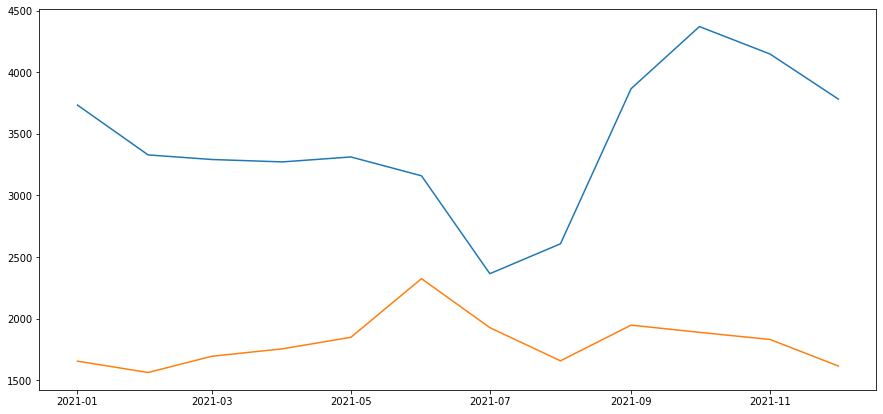

In [82]:
plt.figure(figsize=(15,7))
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)

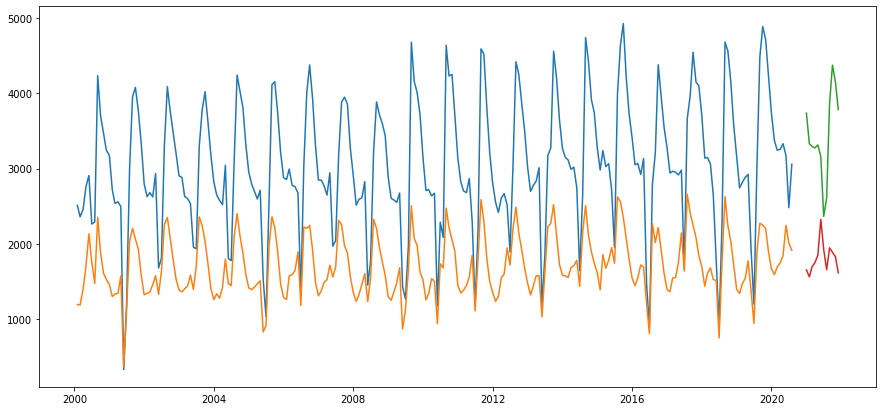

In [83]:
plt.figure(figsize=(15,7))
plt.plot(mumbai_mean.date,mumbai_mean.NDVI)
plt.plot(mumbai_mean.date,mumbai_mean.EVI)
plt.plot(means.date,means.Predicted_NDVI)
plt.plot(means.date,means.Predicted_EVI)